In [50]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [51]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [52]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [53]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [54]:
# View all of the classes that automap found
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [55]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [56]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

## GRADER PLEASE NOTE

* Some of the instructions are different from the original but still adhere to the rubric.
* The students get the average precipitation per day instead of every single precipitation value.

In [57]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date


('2017-08-23')

In [58]:
# date 365 days ago from today
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [59]:
year_ago

datetime.date(2016, 8, 23)

In [60]:
# Using this date, find the average precipitation per day
# for the preceding 12 months of data sorted by ascending date.
result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).\
    order_by(Measurement.date).all()
result



[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [61]:
# List comprehension solution
prcp_rows = [{"Date": result[1], "Precipitation": result[0]} for result in result]
prcp_rows

#     return jsonify(all_passengers)

[{'Date': 0.0, 'Precipitation': '2016-08-23'},
 {'Date': 0.15, 'Precipitation': '2016-08-23'},
 {'Date': 0.05, 'Precipitation': '2016-08-23'},
 {'Date': None, 'Precipitation': '2016-08-23'},
 {'Date': 0.02, 'Precipitation': '2016-08-23'},
 {'Date': 1.79, 'Precipitation': '2016-08-23'},
 {'Date': 0.7, 'Precipitation': '2016-08-23'},
 {'Date': 0.08, 'Precipitation': '2016-08-24'},
 {'Date': 2.15, 'Precipitation': '2016-08-24'},
 {'Date': 2.28, 'Precipitation': '2016-08-24'},
 {'Date': None, 'Precipitation': '2016-08-24'},
 {'Date': 1.22, 'Precipitation': '2016-08-24'},
 {'Date': 2.15, 'Precipitation': '2016-08-24'},
 {'Date': 1.45, 'Precipitation': '2016-08-24'},
 {'Date': 0.08, 'Precipitation': '2016-08-25'},
 {'Date': 0.08, 'Precipitation': '2016-08-25'},
 {'Date': 0.0, 'Precipitation': '2016-08-25'},
 {'Date': 0.0, 'Precipitation': '2016-08-25'},
 {'Date': 0.21, 'Precipitation': '2016-08-25'},
 {'Date': 0.06, 'Precipitation': '2016-08-25'},
 {'Date': 0.11, 'Precipitation': '2016-08-25

In [62]:
# Convert your results into a pandas DataFrame with date as index.
prcp_df = pd.DataFrame(result, columns=['Date', 'Precipitation']).set_index("Date")
prcp_df.dropna(inplace=True)


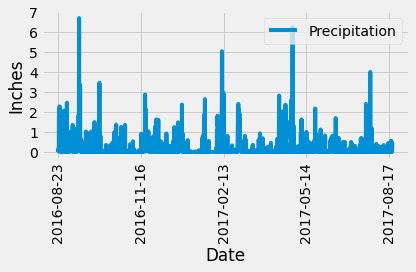

In [63]:
# Use Pandas Plotting with Matplotlib to plot the data
#How can I fix the x ticks?
prcp_df.plot(label = "Precipitation")
y = prcp_df["Precipitation"]
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation="vertical")
plt.legend(loc="upper right")
plt.yticks(np.arange(0, max(y)+1, 1))
plt.tight_layout()
plt.show()


In [64]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [93]:
#app - start date given - returns the minimum temperature, the average temperature, and the max temperature
#for all dates greater than and equal to the start date.
import datetime as dt
date = "2017-08-01"
date2 = "2017-08-03"
# # only start date given
session.query(func.max(Measurement.tobs),func.min(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.date >= date).all()

[(85.0, 70.0, 78.82417582417582)]

In [95]:
# start and end date range
session.query(func.max(Measurement.tobs),func.min(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.date >= date).filter(Measurement.date <= date2).all()

[(83.0, 72.0, 77.5)]

In [94]:
#the tobs data
session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= date).filter(Measurement.date <= date2).order_by(Measurement.date).all()



[('2017-08-01', 77.0),
 ('2017-08-01', 74.0),
 ('2017-08-01', 75.0),
 ('2017-08-01', 72.0),
 ('2017-08-02', 73.0),
 ('2017-08-02', 80.0),
 ('2017-08-02', 83.0),
 ('2017-08-02', 80.0),
 ('2017-08-03', 79.0),
 ('2017-08-03', 81.0),
 ('2017-08-03', 80.0),
 ('2017-08-03', 76.0)]

# Exploratory Station Analysis

In [13]:
#app
#List the stations in descending order.
session.query(Measurement.station).\
    group_by(Measurement.station).all()

[('USC00511918'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00516128'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519281'),
 ('USC00519397'),
 ('USC00519523')]

In [16]:
#app Station name
session.query(Station.station, Station.name).all()

[('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 'KANEOHE 838.1, HI US'),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00517948', 'PEARL CITY, HI US'),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281', 'WAIHEE 837.5, HI US'),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

In [176]:
# Query total number of stations in dataset
session.query(Measurement.station).group_by(Measurement.station).count()

9

In [175]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station)).all()

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [47]:
#app Tobs - query the most active station in the last 12 months
active = session.query(Measurement.station).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).\
    filter(Measurement.date >= year_ago).first()



'USC00519397'

In [48]:
#app Tobs - query tobs for the most active station
session.query(Measurement.tobs).filter(Measurement.station == active[0]).all()

[(65.0),
 (63.0),
 (74.0),
 (76.0),
 (73.0),
 (70.0),
 (64.0),
 (68.0),
 (73.0),
 (64.0),
 (61.0),
 (66.0),
 (65.0),
 (68.0),
 (64.0),
 (72.0),
 (66.0),
 (66.0),
 (69.0),
 (67.0),
 (67.0),
 (71.0),
 (67.0),
 (76.0),
 (68.0),
 (72.0),
 (70.0),
 (67.0),
 (66.0),
 (67.0),
 (69.0),
 (67.0),
 (67.0),
 (64.0),
 (69.0),
 (73.0),
 (73.0),
 (69.0),
 (69.0),
 (69.0),
 (71.0),
 (61.0),
 (69.0),
 (63.0),
 (64.0),
 (65.0),
 (67.0),
 (68.0),
 (65.0),
 (76.0),
 (75.0),
 (66.0),
 (70.0),
 (72.0),
 (73.0),
 (70.0),
 (71.0),
 (72.0),
 (72.0),
 (69.0),
 (70.0),
 (73.0),
 (72.0),
 (73.0),
 (70.0),
 (71.0),
 (68.0),
 (70.0),
 (72.0),
 (69.0),
 (68.0),
 (74.0),
 (72.0),
 (72.0),
 (73.0),
 (74.0),
 (73.0),
 (73.0),
 (74.0),
 (74.0),
 (74.0),
 (71.0),
 (72.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (73.0),
 (73.0),
 (71.0),
 (71.0),
 (68.0),
 (70.0),
 (71.0),
 (74.0),
 (71.0),
 (75.0),
 (76.0),
 (75.0),
 (75.0),
 (76.0),
 (76.0),
 (76.0),
 (77.0),
 (77.0),
 (73.0),
 (74.0),
 (76.0),
 (76.0),
 (80.0),
 (74.0),
 

In [174]:
# Using the station id from the previous query, calculate the lowest, 
# highest, and average temperature recorded for this station.
session.query(Measurement.station, func.max(Measurement.tobs), \
              func.min(Measurement.tobs), \
              func.avg(Measurement.tobs)).\
            filter(Measurement.station == 'USC00519281').all()

[('USC00519281', 85.0, 54.0, 71.66378066378067)]

In [180]:
# Query the last 12 months of temperature observation data for this station.
# Plot the results as a histogram with bins = 12.
tobs = session.query(Measurement.station, Measurement.tobs).\
            filter(Measurement.station == 'USC00519281').filter(Measurement.date >= year_ago).all()


In [219]:
tobs_df = pd.DataFrame(tobs, columns=["ID","Temperature"])

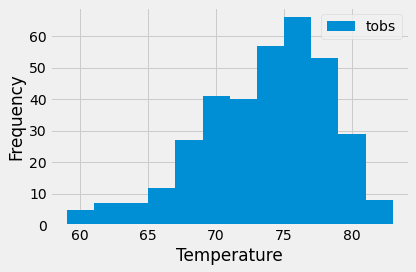

In [264]:
plt.hist(tobs_df["Temperature"],bins = 12, label = "tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

# Close session

In [281]:
# # Close the session
# session.close()